In [1]:
import pandas as pd
df = pd.read_csv('data.csv', index_col='Id')

## Tag analysis
Before diving in the analysis _per se_, let's have a look at the different tags used. It will give us a better understanding of the situation and, with a bit of work, we might already be able to spot some trends.

We want to do a few things with those tags. We want to have a look at what the bulk of the questions are about and we also want to see if there are some common combinations. All this will eventually be plotted against the "Quality" of a post to try and identify trends.

### Wordcloud
Let's build a quick function to clean up the `Tags` field and get it in a usable form:

In [2]:
def wc(text):
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'

In [3]:
tags = []
for i in df['Tags'].apply( lambda x:wc(x)):
    for tag in i.split():
        tags.append(tag)

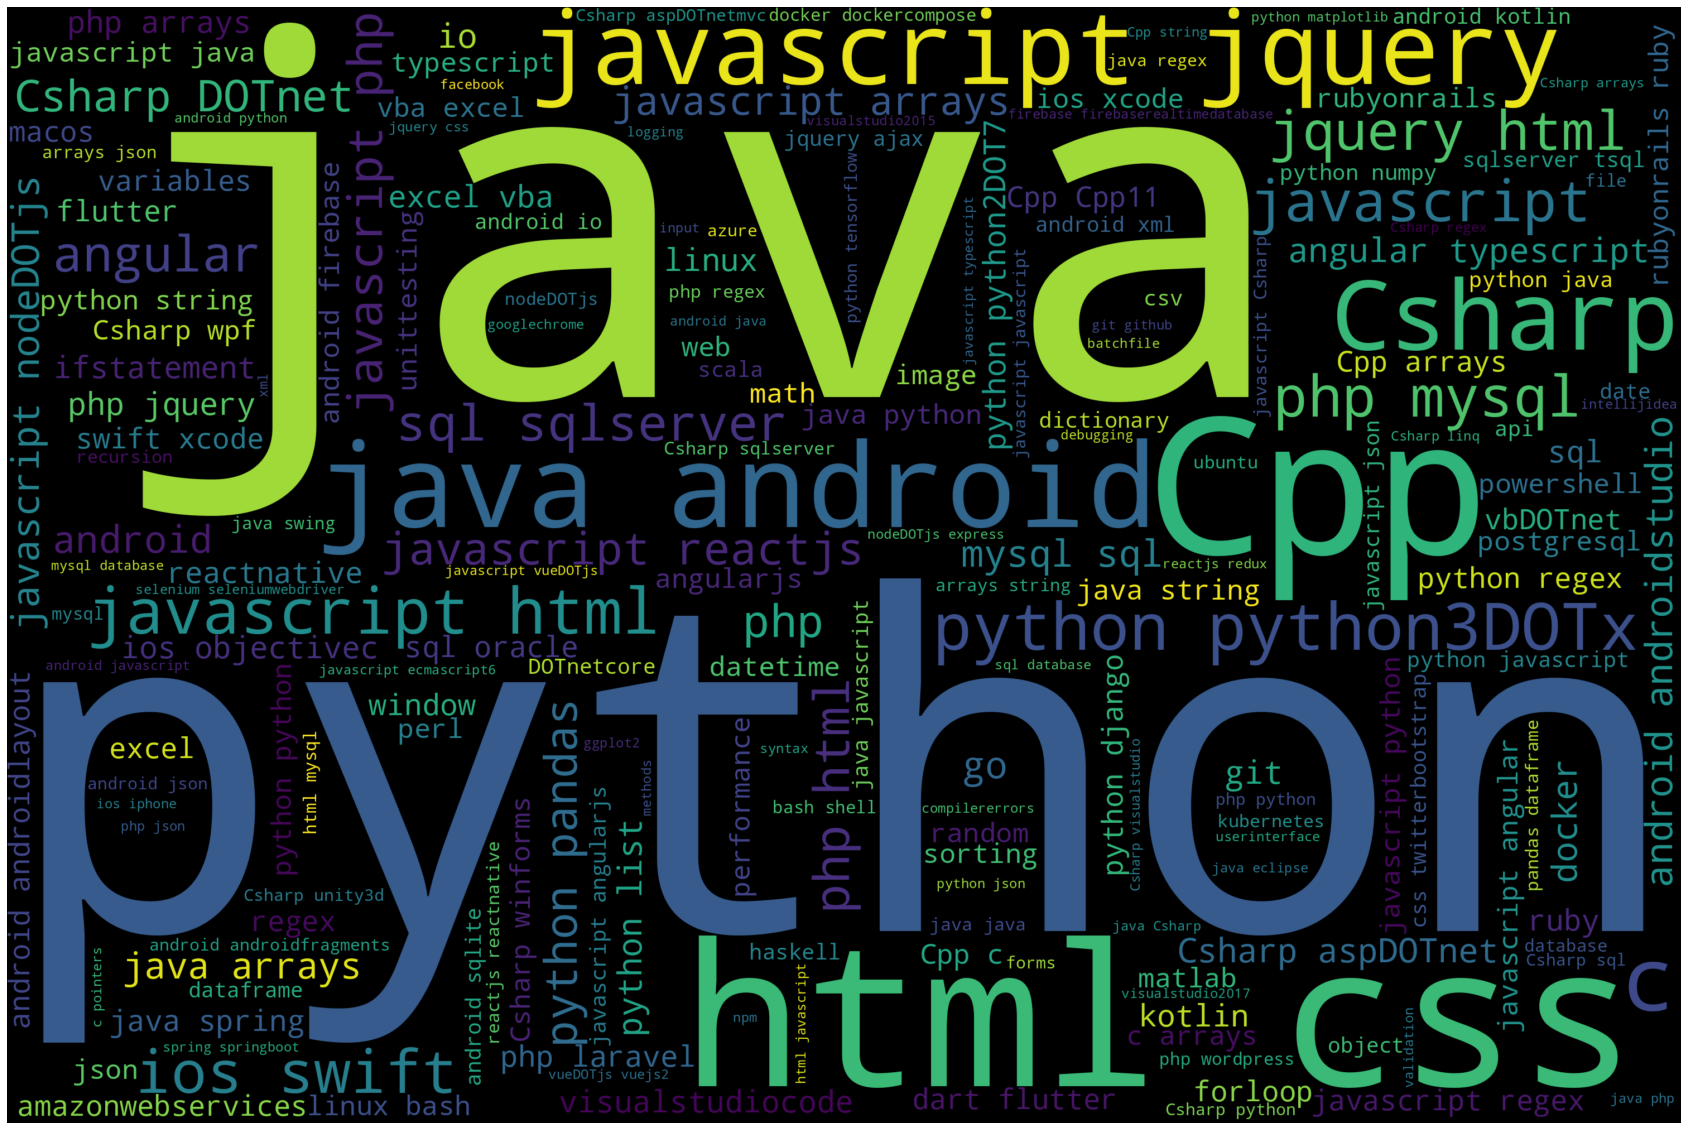

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,30)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      include_numbers=True,
                      regexp='\w+' # Allows C, R to be parsed as words
                     )

wordcloud.generate(" ".join(tags))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
wordcloud.words_

{'java': 1.0,
 'python': 1.0,
 'html css': 0.8804682686383241,
 'Cpp': 0.818237831176833,
 'java android': 0.8009858287122612,
 'javascript jquery': 0.758471965495995,
 'Csharp': 0.6925446703635243,
 'c': 0.5884165126309304,
 'python python3DOTx': 0.5730129390018485,
 'javascript html': 0.5428219346888478,
 'ios swift': 0.47566235366605053,
 'javascript': 0.4349969192852742,
 'php mysql': 0.4319162045594578,
 'jquery html': 0.38878619839802836,
 'sql sqlserver': 0.33271719038817005,
 'angular': 0.32224276032039434,
 'php html': 0.314849044978435,
 'javascript php': 0.29944547134935307,
 'javascript reactjs': 0.26062846580406657,
 'php': 0.26001232285890324,
 'python pandas': 0.26001232285890324,
 'Csharp DOTnet': 0.24584103512014788,
 'javascript arrays': 0.24460874922982132,
 'javascript nodeDOTjs': 0.23043746149106592,
 'android': 0.22982131854590265,
 'go': 0.22119531731361675,
 'mysql sql': 0.21934688847812692,
 'android androidstudio': 0.2174984596426371,
 'java arrays': 0.2076401

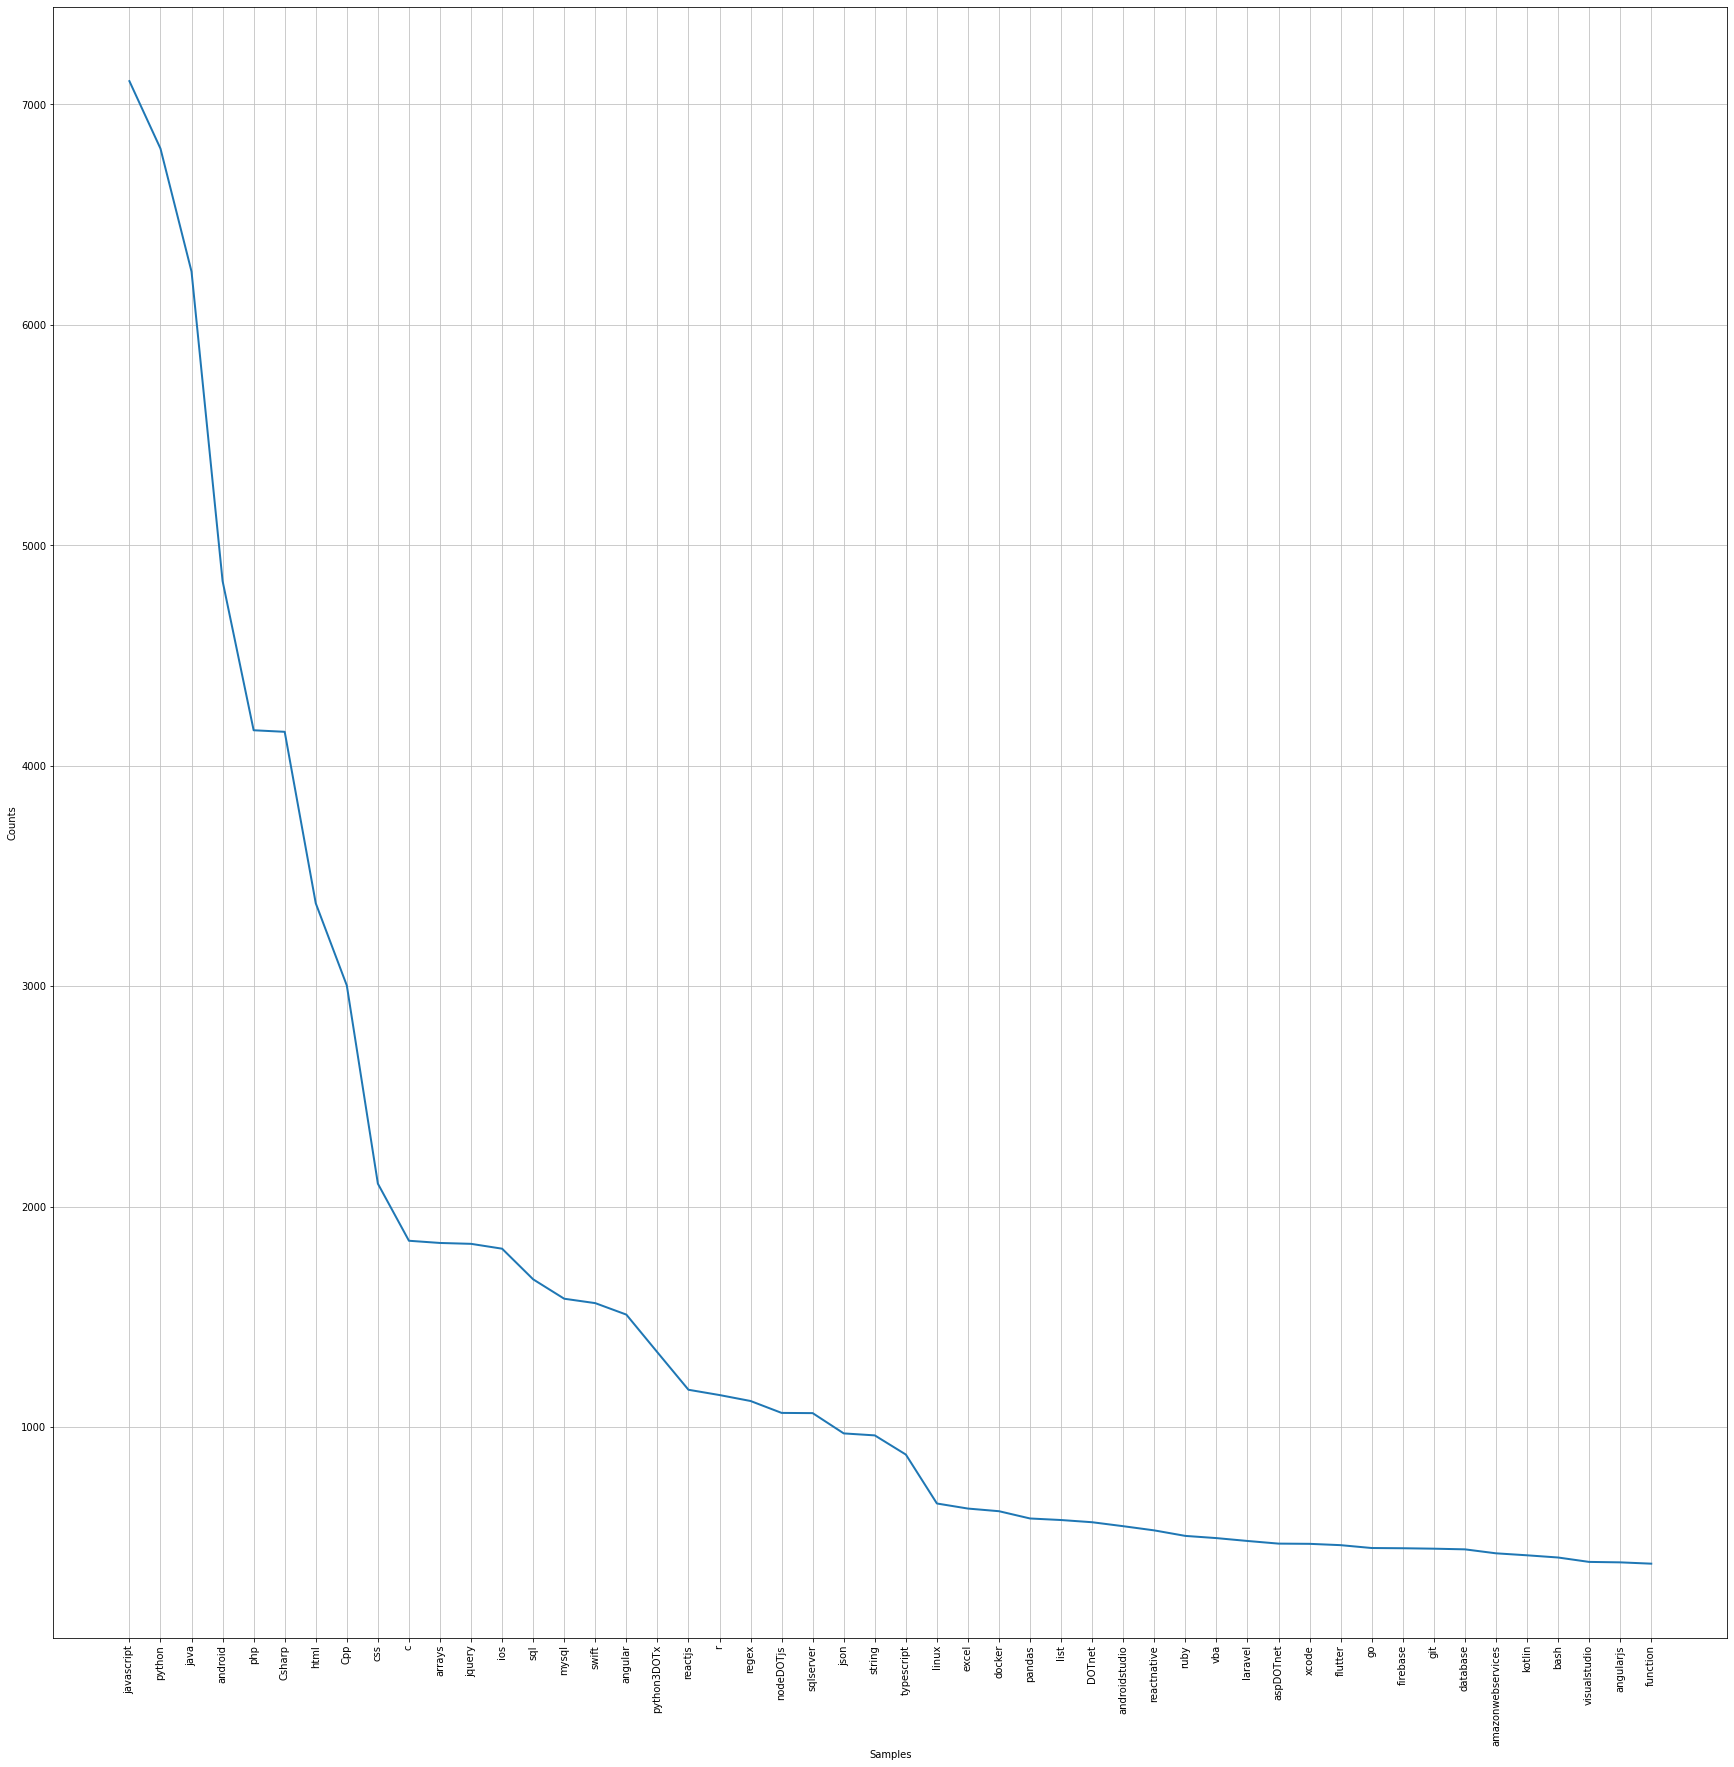

In [8]:
from nltk import FreqDist
FreqDist(tags).plot(50)
plt.show()

From the wordcloud and the FreqDist, we can already see a few things:
- Javascript and Python are the most asked about language, followed by Java.
- Javascript is the most common language on SO but is always paired with other technologies like `html`,`jquery`, etc.
- Talking about pairs, we can already spot a few common ones: meaningful like `java android`, less valuable like `python python 3.x` (which probably "inflates" the python frequency).
## N-grams

In [31]:
from nltk.util import ngrams
def clean_tags(text):
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
bag = {}
for tag in df['Tags'].apply(lambda x: clean_tags(x)):
    # Get the previous entry, or 0 if not yet documented; add 1
    bag[tag] = bag.get(tag, 0) + 1 

for w in sorted(bag, key=bag.get, reverse=True):
    print(w, bag[w])

# list(ngrams(tags, 2)).value_counts()[:10]

python 1068
java 1013
javascript 879
c# 672
c++ 668
php 564
c 542
android 510
html css 426
python python-3.x 375
javascript jquery 348
java android 339
r 289
php mysql 263
javascript html 260
sql sql-server 242
angular 233
javascript jquery html 156
python pandas 155
javascript html css 148
excel vba 148
ios swift 137
go 130
swift 129
mysql 126
mysql sql 122
ruby 118
dart flutter 118
sql-server 116
javascript jquery html css 116
php html 114
javascript arrays 114
javascript reactjs 113
javascript regex 111
typescript 110
sql 108
java arrays 100
vba excel 99
python regex 98
css 93
sql oracle 91
flutter 90
regex 86
php arrays 86
python list 86
jquery 84
react-native 84
kotlin 79
python python-2.7 77
git 77
html 77
vb.net 77
reactjs 75
c# .net 72
python-3.x 72
android android-studio 72
angular typescript 71
visual-studio-code 70
docker 69
c# winforms 63
perl 61
c# regex 61
java string 60
c# linq 56
javascript php 55
kubernetes 55
php laravel 55
c# unity3d 55
java regex 55
javascript node.

amazon-web-services terraform 3
azure azure-active-directory 3
android android-studio android-emulator 3
android apk 3
regex validation 3
azure 3
algorithm data-structures 3
google-cloud-functions 3
pandas 3
mysql mysqli 3
typescript tslint 3
android android-studio adb 3
html css css-position 3
c output 3
java arrays stack 3
mysql sql join 3
python format 3
scikit-learn 3
ios iphone swift swift3 3
java android sql 3
mongodb ubuntu 3
javascript php html css mysql 3
javascript jquery wordpress 3
java arrays for-loop 3
python encryption 3
css css-grid 3
java arraylist hashmap 3
php html css mysql 3
android android-volley 3
mongodb mongoose 3
python pseudocode 3
c# arrays unity3d 3
android json android-volley 3
javascript google-chrome google-chrome-extension 3
c++ namespaces 3
javascript es6-class 3
git github git-branch 3
google-app-engine google-cloud-platform 3
java arrays random 3
python django django-views 3
c# class 3
python max 3
xamarin.forms 3
airflow apache-airflow 3
chart.js 3


reactjs npm 2
c++ regex 2
react-native react-native-ios 2
python keras lstm recurrent-neural-network 2
python python-3.x tensorflow 2
excel powershell 2
jsf primefaces 2
javascript mocha 2
docker dockerfile alpine 2
c# php 2
python unicode 2
javascript php jquery json ajax 2
rest http 2
spring resttemplate 2
regex python-2.7 2
java string parsing 2
swift protocols 2
c# .net async-await 2
amazon-web-services amazon-iam 2
python-3.x pycharm 2
c# timespan 2
javascript arrays google-maps 2
webpack webpack-dev-server webpack-2 2
python python-3.x error-handling 2
linux nginx 2
arrays ruby multidimensional-array 2
debian 2
css vue.js vuejs2 vue-router routerlink 2
android ios apk 2
google-compute-engine gcloud 2
c fgets 2
node.js ecmascript-6 es6-modules 2
gitlab-ci 2
java json parsing 2
docker jenkins dockerfile jenkins-pipeline 2
python python-asyncio aiohttp 2
python opencv docker 2
python airflow apache-airflow 2
c++ visual-studio c++11 2
c# .net wpf visual-studio 2
c# indexoutofrangeexc

database database-design 1
python data-processing 1
c# entity-framework entity-framework-6 1
node.js express typescript typescript1.7 1
github open-source uwp 1
git intellij-idea version-control 1
javascript jquery window simplemodal 1
java oracle tomcat servlets jdbc 1
android parse-platform 1
mongodb meteor database-design 1
git github repository 1
multidimensional-array julia 1
android geolocation react-native 1
javascript reactjs material-design material-ui 1
php mysql date datetime datetime-format 1
filter typescript pipe angular 1
node.js ssl npm httpserver 1
c# vb.net string list integer 1
python python-3.x coroutine python-asyncio 1
android android-audiomanager 1
python pygame kill 1
android android-ndk android-gradle-plugin 1
c++ overflow valgrind callgrind 1
java android push-notification google-cloud-messaging 1
macos openssl homebrew 1
php variables attributes woocommerce slug 1
linux gmail mailx ssmtp 1
java linux jvm debian 1
c# wpf visual-studio-2015 1
javascript android

php mysql laravel laravel-5.1 1
c# c++ operators conditional-statements 1
php wamp 1
npm travis-ci 1
r xgboost 1
angular angular-ngmodel bootstrap-datetimepicker 1
c++ parsing compiler-construction bison lexer 1
c# asp.net winforms iis 1
angularjs angular angular2-testing 1
c++ linux windows compiler-errors 1
spring-mvc spring-security error-handling 1
angularjs number-formatting 1
scala scala-collections seq 1
mysql visual-studio database-design 1
html web-services web 1
javascript google-chrome webrtc chromium web-audio-api 1
reactjs ecmascript-6 eslint 1
python async-await python-asyncio 1
ruby enumerable 1
c# asp.net authentication asp.net-core asp.net-core-mvc 1
ios swift nsfilemanager 1
medium.com 1
javascript date datetime momentjs 1
django http http-headers 1
r performance statistics chi-squared 1
android google-chrome 1
routing angular hashtag 1
android gradle jar android-gradle-plugin 1
c++ c compilation execute 1
javascript html favicon pushstate 1
c undefined-behavior 1
jav

php jpeg exif 1
c# visual-studio-2015 linker-errors 1
python date datetime pandas 1
import module typescript 1
c# inheritance abstract 1
java encryption bytearray aes 1
debugging webkit playstation ps4 1
git version-control firebase 1
go memory-address memory-access 1
ios json 1
ruby-on-rails ruby-on-rails-4 ruby-on-rails-5 1
express reactjs react-engine 1
mysql mysql-error-1064 1
php mysql magento 1
spring spring-xd 1
ios swift storekit skpaymenttransaction 1
bpel bpmn 1
video content-management-system 1
c++ xcode macos opengl 1
ios firebase cocoapods firebase-realtime-database 1
cmake msys 1
vbscript sendmail 1
javascript getter 1
python html json github 1
p2p nat bittorrent stun dht 1
python python-2.7 pdfminer 1
c++ sorting vector 1
c++ ubuntu makefile cmake point-cloud-library 1
laravel-4 1
javascript node.js firebase 1
java loops structure 1
python python-3.x websocket python-3.5 python-asyncio 1
firebase openid firebase-authentication 1
javascript shadow-dom 1
c# entity-framewor

c arrays string output-formatting 1
autolayout resize uilabel constraints 1
algorithm hashtable 1
php laravel-5.2 1
php html css pdo 1
regex criteria 1
html css drop-down-menu main overlap 1
c# winforms size screen resolution 1
c# arrays console 1
angularjs sublimetext3 1
python arrays string pandas numpy 1
asp.net authentication web-config event-log health-monitoring 1
c# system.reactive .net-core 1
mysql database excel cloud spreadsheet 1
html twitter-bootstrap svg responsive 1
php laravel-5 laravel-5.2 1
spring-boot gemfire 1
algorithm graph minimum-spanning-tree 1
c# .net winforms rtf 1
php html facebook 1
c# asp.net excel asp.net-mvc-5 1
c# mysql wpf binding 1
c# visual-studio-2015 c#-interactive 1
apache .htaccess mod-rewrite 1
influxdb 1
heroku angular xmlhttprequest cors 1
visual-studio powershell 1
javascript regex text-processing 1
visual-studio typescript 1
javascript html google-chrome browser-cache prefetch 1
android google-play avd 1
visual-studio reference nuget uwp 1
ba

c# indexoutofrangeexception unhandled 1
mongodb mongodb-.net-driver 1
c opengl gtk 1
c++ c embedded mbed 1
java netflix-eureka spring-cloud-netflix wiremock feign 1
ios xcode compatibility bitcode 1
c++ macos terminal osx-elcapitan 1
javascript arrays string helpers 1
ios xcode xctest xcode8 1
php laravel laravel-validation 1
wordpress accelerated-mobile-page 1
java properties 1
angular model-binding angular-ngmodel 1
python tensorflow protocol-buffers 1
javascript angular http-status-code-404 systemjs 1
logging spring-boot 1
android android-canvas 1
tableau-api 1
ios apple-watch xcode8 1
javascript node.js ecmascript-6 babel 1
php apache http response keep-alive 1
javascript angularjs testing automation protractor 1
google-analytics seo meta-tags google-ranking 1
sql oracle oracle11g pivot-table 1
angular zonejs 1
c# visual-studio thread-sleep 1
python loops console 1
php mysql swift 1
python algorithm optimization 1
c++ move unique-ptr 1
java arrays if-statement for-loop isbn 1
pytho

python performance python-2.7 1
python python-2.7 calculator 1
database heroku billing 1
c++ inheritance segmentation-fault switch-statement 1
java swing jtextfield 1
android async-await 1
android android-optionsmenu 1
angular ionic2 rxjs 1
haskell pattern-matching strictness 1
visual-studio xamarin xamarin.forms windows-10 cross-platform 1
c algorithm performance assembly embedded 1
c# gmail 1
java command prompt 1
tensorflow deep-learning keras lstm keras-layer 1
r methods arguments 1
java java.util.scanner area 1
ruby namespaces 1
r date dataframe overlap 1
azure azure-service-fabric azure-application-gateway 1
angular input internationalization placeholder 1
cordova ibm-mobilefirst 1
python pandas dataframe concatenation nan 1
php api curl volusion 1
docker-compose dockerfile 1
c++ arrays file 1
javascript reactjs react-router tizen tizen-web-app 1
android android-studio release aar 1
html css mobile media-queries responsive 1
angular components 1
c pointers queue structure 1
pytho

memory makefile build parallel-processing 1
javascript jquery html mobile 1
jquery twitter-bootstrap bootstrap-modal bootstrap-select 1
is-empty accumulo 1
python python-requests telegram telegram-bot 1
html css spacing 1
apache homebrew uninstallation httpd.conf macos-sierra 1
c linux function 1
android python opencv 1
machine-learning neural-network artificial-intelligence perceptron 1
dependencies dockerfile dpkg 1
javascript google-chrome mouseevent 1
javascript html twitter-bootstrap css 1
ios react-native picker 1
ios uitableview swift3 tableviewcell 1
dataset ocr tesseract 1
sql postgresql date 1
java json csv 1
c# regex replace 1
python image machine-learning scikit-learn 1
java sql derby 1
ios nsdatecomponentsformatter 1
python list indexing tensorflow 1
php magento soap proxy 1
maven https proxy jhipster 1
python machine-learning tensorflow 1
json angular typescript 1
c# string int console.writeline 1
ios swift swift3 nsmutabledata 1
android svg 1
angular typescript observabl

c# html rtf 1
testing elixir phoenix-framework ecto 1
java encryption hash groovy cryptography 1
python jupyter 1
c++ string pointers int 1
ruby-on-rails ruby reactjs karma-runner karma-jasmine 1
javascript jquery charts chart.js 1
php server cron jobs 1
ios wifi 1
c# angularjs selenium angular protractor 1
javascript ios html google-chrome html5-history 1
mysql sql limit 1
c# oop programming-languages 1
macos in-app-purchase app-store-connect screenshot 1
mongodb google-bigquery 1
javascript html class 1
math probability 1
python regex bash perl shell 1
c# .net tuples c#-7.0 1
google-calendar-api google-api-client alexa 1
python ruby-on-rails heroku cloud heroku-toolbelt 1
ios swift swift3 xcode8 1
python input output addition 1
java datetime 1
c# .net visual-studio visual-studio-2012 nuget-package 1
c++ regex url ip 1
java if-statement boolean 1
java android android-studio static 1
java console tic-tac-toe 1
java sonarqube code-separation 1
php redirect laravel-5 1
javascript flux vu

python dataframe dataset 1
list python-3.x pandas dataframe 1
c++ macos makefile 1
javascript typescript typeorm 1
angular typescript ionic2 exif-js 1
json serialization go 1
java arrays java.util.scanner 1
python pip virtualenv egg 1
scala intellij-idea import scala-implicits 1
c# linq list arraylist visual-studio-2015 1
swift checkbox 1
javascript html google-maps-api-3 1
javascript angular binding 1
android blame git-blame 1
apache symfony virtualhost httpd.conf 1
php jquery autocomplete field autofill 1
npm dependencies package.json 1
jsdoc 1
c# function return 1
.net humanizer 1
c# constructor nullreferenceexception encapsulation 1
c string binary 1
python algorithm python-3.x 1
http curl go httpresponse 1
python numpy tensorflow keras 1
gradle jacoco 1
kotlin suppress-warnings 1
bash jq 1
c# razor json.net jira-rest-api 1
android android-layout android-actionbar badge 1
json google-bigquery 1
spring-boot spring-webflux 1
smalltalk 1
r floating-point 1
ssl heroku https dns google-

swift macos cocoa nsmenu nsmenuitem 1
php perl 1
excel email gmail spreadsheet 1
c++ number-theory 1
google-sheets google-api google-visualization 1
c++ performance loops math while-loop 1
angularjs angularjs-material md-select 1
python c++ opencv numpy 1
python django bash shell 1
c++ visual-studio gcc operators 1
python numpy plot turtle-graphics mandelbrot 1
graphics glsl shader vulkan 1
r filter macros 1
java spring maven junit logback 1
json perl 1
raspberry-pi3 gpio 1
go google-cloud-platform 1
javascript android drag-and-drop 1
javascript node.js amazon-web-services amazon-s3 1
ios iphone ios7 1
javascript web-scraping bots 1
javascript php html css twitter-bootstrap 1
c# overloading 1
c++ mysql qt 1
php mysql file input dao 1
ios iphone xcode debugging 1
php mysql mysqli prepared-statement 1
json csv http parquet amazon-athena 1
sql eclipse postgresql 1
rust bson 1
javascript arrays sorting random negative-number 1
c++ visual-studio debugging 1
avr 1
java android sqlite android

python pandas indexing 1
node.js httpmodule 1
c# asp.net appsettings 1
php mysql post utf-8 1
java image-processing 1
machine-learning neural-network conv-neural-network 1
java android xml localization 1
f# visual-studio-code .net-core 1
react-native react-native-flatlist react-native-flexbox 1
microsoft-graph-api adal msal 1
css responsive-design media-queries display 1
regex python-3.x f-string 1
tensorflow conv-neural-network image-recognition 1
c++ templates gcc c++17 type-deduction 1
c# sap bapi sap-dotnet-connector 1
java android sqlite cursor android-sqlite 1
java trim 1
android android-layout android-edittext 1
javascript php arrays function recursion 1
ios swift xcode ios6 uicontrol 1
wordpress wordpress-theming custom-wordpress-pages 1
python for-loop lambda list-comprehension 1
html video youtube 1
javascript html ajax wordpress 1
linux disk 1
python python-2.7 assert 1
perl file file-handling 1
javascript variables logging console 1
c# .net console-application crud 1
c# typ

machine-learning python derivative numpy 1
c gcc assembly x86 1
ruby-on-rails-4 rspec-rails 1
java hadoop mapreduce 1
php mysql linux 1
internet-explorer-11 bootstrap-4 1
c++ visual-studio-code intellisense 1
c# algorithm cryptography .net-core rsa 1
eclipse minecraft 1
arrays subset julia 1
shell filesystems macos-high-sierra apfs 1
google-chrome indexeddb web-sql 1
javascript reactjs login redux jwt 1
angular angular-i18n 1
java performance arraylist 1
c# wpf datagrid 1
c++ dynamic 1
java spring-boot spring-security remember-me 1
java java.util.date 1
java json ajax 1
c# .net pdf 1
machine-learning reinforcement-learning 1
android-source android-auto 1
active-directory passwords 1
macos-high-sierra 1
haskell monad-transformers 1
ios iphone html5-video linkedin 1
java multithreading loops selenium for-loop 1
node.js express activerecord database-migration 1
html excel vba dom web-scraping 1
regex chemistry cheminformatics 1
ip 1
cuda gpu gpu-programming 1
android android-activity mvvm

c# php mysql unity3d 1
css scrollbar padding 1
android google-play android-api-levels 1
c linux output-redirect 1
node.js angular-cli ng-build 1
angular components lazy-loading angular-components 1
java spring debugging spring-boot 1
java bash javac 1
php mysql insert 1
sql oracle-apex 1
angular nginx routes 1
reactjs font-awesome gatsby 1
haskell coq agda idris dependent-type 1
angular service-worker progressive-web-apps 1
android performance sqlite android-layout sharedpreferences 1
reactjs react-native styles react-props 1
html css video svg frontend 1
r probability 1
java file jar directory 1
amazon-web-services amazon-ec2 amazon-cloudformation amazon-elb 1
python numpy indexing 1
ios swift locale nsnumberformatter 1
c# asp.net-mvc entity-framework asp.net-ajax 1
mongodb replicaset changestream 1
json vb.net json.net 1
mysql sql regex sql-like 1
php json cors 1
php runtime-error user-input sanitization filter-input 1
assembly stack mips 1
python tkinter python-2.x 1
java android bi

javascript async-await web-worker 1
c++ structure 1
python tensorflow pip virtualenv 1
android android-intent kotlin fragment 1
terminal visual-studio-code zsh font-size 1
ruby cucumber watir-webdriver 1
typescript type-inference 1
android react-native gradle 1
matlab octave 1
c regex file-io dynamic-memory-allocation 1
python-3.x timescaledb 1
java performance garbage-collection jvm jvm-hotspot 1
android ios user-interface dart flutter 1
java maven tomcat jax-ws webservice-client 1
java android layout-inflater 1
c loops for-loop conditional-statements 1
android dynamic tablelayout 1
postgresql pg-dump pg-restore postgresql-10 1
vba documentation 1
mongodb mongodb-query mongodb-compass 1
python django http redirect https 1
javascript dictionary foreach 1
sql sql-server dynamic xquery 1
reactjs typescript react-native react-navigation 1
javascript jquery arrays object recursion 1
python python-3.x crash freeze turtle-graphics 1
ios swift core-data cllocationcoordinate2d 1
java input tex

string kotlin char kotlin-android-extensions 1
python python-import 1
ubuntu-server 1
icons material-design google-material-icons 1
npm dependencies package.json shrinkwrap package-lock.json 1
c# networking 1
android string date datetime 1
r ggplot2 facet-grid 1
python python-asyncio 1
kotlin shape equation 1
python oop tkinter nameerror 1
ios swift uitableview uinavigationcontroller 1
vb.net list settings my.settings 1
go split slice file-extension 1
c linux bash exec unlink 1
javascript angular angular6 1
php asp.net-mvc razor steam 1
c++ gcc inline c++17 libstdc++ 1
python printing backslash 1
node.js amazon-web-services adfs aws-cognito 1
node.js linux npm 1
mysql sql oracle11g 1
java android android-asynctask android-service 1
django nginx django-staticfiles whitenoise 1
ubuntu-18.04 gpg-agent 1
css reactjs material-ui 1
torch pytorch 1
list dictionary generics types dart 1
image canvas dart save flutter 1
r text scanf 1
typescript generics 1
ruby-on-rails ubuntu nginx ubuntu-16.0

python function recursion numbers 1
angularjs validation angularjs-forms 1
react-redux jestjs 1
scala apache-spark dataframe apache-spark-sql 1
android testing appium katalon-studio 1
javascript arrays object lodash 1
python arrays dictionary object 1
c++ r math rcpp 1
java arraylist processing 1
php mysql database select migration 1
javascript reactjs react-router material-ui react-router-dom 1
javascript java salesforce apex 1
react-native react-native-android react-native-ios react-native-linking 1
.net windows ssl service apple-push-notifications 1
javascript typeof 1
angular form-control 1
android android-intent actions-on-google 1
excel vba string conditional-formatting 1
python macos memory-management lldb bllip-parser 1
javascript jquery disabled-input 1
excel csv ms-word 1
c++ templates c++14 perfect-forwarding 1
java android xml layout 1
php arrays sorting multidimensional-array 1
charts primefaces jsf-2.2 1
questasim 1
c++ oop c++11 visual-c++ 1
python python-2.7 if-statemen

regex linux vim vi regular-language 1
json symfony twig 1
java datetime datetime-format java-time datetime-parsing 1
python recursion binary 1
java hibernate casting 1
r twitter unicode utf-8 1
c++ sql database sqlite 1
macos search command-line find 1
mysql join group-by where logical-operators 1
java math int double 1
android firebase firebase-realtime-database google-maps-api-3 google-maps-markers 1
sql r 1
laravel artisan 1
c++11 cmake compiler-errors member-functions non-static 1
bit-manipulation xor bitwise-xor 1
php algorithm sorting logic 1
statistics pca variance 1
c formatting printf 1
java javafx pane 1
python r dplyr 1
selenium google-chrome firefox geckodriver selenium-iedriver 1
c++ function c++14 depth-first-search 1
python python-3.x pandas matplotlib data-visualization 1
android api android-volley 1
asp.net-core odata asp.net-core-2.2 1
r parsing 1
android android-layout user-interface chat whatsapp 1
javascript reactjs firebase react-native google-cloud-firestore 1
sq

python loops boolean 1
jquery ajax rxjs 1
html css internet-explorer css-grid 1
reactjs tooltip ag-grid ag-grid-react 1
ios swift core-bluetooth 1
go google-app-engine go-gin 1
c algorithm logic bitstuffing 1
selenium-webdriver rspec 1
reactjs formik yup 1
c# arrays class instantiation 1
regex bash perl 1
haskell types 1
c# .net dependency-injection 1
python-3.x ubuntu-18.04 cx-oracle 1
postgresql homebrew icu4c 1
emacs markdown spacemacs 1
go deferred-execution 1
python group-by itertools 1
javascript php laravel web vue.js 1
haskell memory timeout quickcheck 1
cntk 1
javascript c# google-maps google-poly 1
javascript css nouislider 1
java date datetime difference date-difference 1
java macos java-8 homebrew 1
javascript php html image-processing web-applications 1
java composition 1
python continue 1
python visual-studio-code pytest vscode-settings 1
c# sql sql-server entity-framework stored-procedures 1
svelte hot-reload 1
java jsondecoder 1
android findbugs 1
python django django-r

python pandas dataframe latex 1
css google-chrome media-queries macos-darkmode 1
ios swift uistatusbar ios13 1
angular angular7 angular8 1
android alignment android-constraintlayout multiline 1
c date-conversion 1
c++ templates visual-c++ enums template-specialization 1
tensorflow import object-detection-api 1
laravel tinymce 1
ios swift inheritance swiftui ios13 1
html css media-queries css-grid 1
c# dao 1
image google-maps static 1
html css graphical-logo 1
swift xcode11 swift-package-manager 1
javascript selenium protractor 1
css wordpress woocommerce 1
html security 1
c++ pointers linked-list 1
javascript jquery arrays json typeerror 1
c# azure azure-devops devops 1
node.js angular amazon-web-services amazon-s3 1
android gradle proguard android-r8 1
python python-idle 1
angular cordova android-studio ionic-framework cordova-plugins 1
excel vba if-statement 1
c++ linux qt g++ initializer-list 1
c concatenation c-strings 1
python-3.x python-2.7 debian-buster 1
angular typescript ngrx

android android-studio mobile ide 1
javascript reactjs getter-setter 1
technical-indicator 1
python python-3.x xml parsing xml-parsing 1
c# sap saprfc bapi function-module 1
javascript reactjs variable-assignment assignment-operator destructuring 1
regex awk 1
python pandas list numpy nested-lists 1
samesite 1
python linux cron 1
centos repository yum dnf 1
linux bash shell ubuntu 1
python list dictionary nested 1
javascript excel vba google-apps-script google-sheets 1
javascript php video 1
python python-3.x set 1
python pdf 1
sql-server datetime null 1
javascript shapes 1
html meta-tags head 1
python append 1
python algorithm list 1
c shellcode aslr 1
c# loops sorting iteration bubble-sort 1
pandas tuples shapefile geopandas shapely 1
javascript reactjs encryption 1
javascript node.js base64 data-uri 1
regex visual-studio-code word-count asciidoc 1
c# .net wpf datagrid 1
javascript http security ssl https 1
javascript html css reactjs material-ui 1
c++ c++11 constants copy-constructo

## Strategies
### Word focused
If the vocabulary is what you are looking at, the next step is to remove the punctuation and the stopwords. 

With the following code, we are going to generate a list of words used in the `Body` column. It won't be extremely useful for the classification task but comparing vocabulary can be very revealing (given the right subset: spam vs. regular emails,etc.).

Once we have a list of words, we can start the vocabulary analysis by coding a counter or using `FreqDist` from the `nltk` library for example.

In [ ]:
wordcloud.words_

In [ ]:
from nltk import word_tokenize
for text in df['Body']:
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words = [word for word in tokens if word not in stop_words]

In [ ]:
from nltk.corpus import stopwords
import string

stop_words = list(string.punctuation)
stop_words += stopwords.words('english')

In [ ]:
def toklowstop(text):
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words = [word for word in tokens if word not in stop_words]
    return words

In [ ]:
df['Body'].apply(lambda x: toklowstop(x))

In [ ]:
FreqDist(words).plot(50)
plt.show()

## Wordcloud
Wordclouds are to text data what pie charts are to numerical data. They are at best confusing and at worst useless. But it can be generate a nice picture for your article header :)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      stopwords = stop_words)

wordcloud.generate(" ".join(words))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Stemming
This process is going to remove the ending of the words, shrinking them to their stem, their common denominator. For example, in the following list:
- programmer
- programmation
- programmed
- programming
- program
- programme

The stem of these words is **program**. It is easy to imagine a stemmed document being harder to read (by a human at least) but at the same time, it is going to be easier to compare different documents. This "normalization" is going to help make a model more robust as the ambiguity is reduced.

It is worth noting:
- there are a lot of stemming algorithms, available in various languages. [nltk.stem API module](https://www.nltk.org/api/nltk.stem.html) will give you a list of stemming classes available with NLTK.
- whilst stemming simplifies a document, it also creates "new" noise:  the stem for "flies" is "fli" for example.
- whilst stemming simplifies a document, it will induce a loss of information. For example, in the "program" list above, programme is the British spelling and program, the American spelling. If the origin of the review is not an important information for your analysis: Great, stemming has made this simpler! However if the localisation is key to your problem, you might miss some nuances by stemming your documents.

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
def stem(document):
    """
    Stemming words using 
    """
    doc_split = document.split(' ')
    stemmed = ''
    for word in doc_split:
        stemmed += stemmer.stem(word) + ' '
        
    return stemmed

## Lemmatisation